In [63]:
import pandas
import matplotlib

In [64]:
%matplotlib inline

In [65]:
#nastaveni vetsiho pisma
matplotlib.rcParams['figure.figsize'] = (10, 5)

In [66]:
cena_bytu = pandas.read_csv('soubory/cena_bytu.csv', index_col=0)
mesta_cr = pandas.read_csv('soubory/mesta_cr.csv', index_col=0)
kurz_czk_euro = pandas.read_csv('soubory/kurz_czk_euro.csv')
kurz = pandas.read_csv('soubory/kurz.csv', index_col=0)

In [67]:
cena_bytu

,price,balance_month
location,,
Brno,12400,0.15
Praha,13800,0.02
Ostrava,9700,-0.14
Liberec,11100,0.04
Znojmo,10200,-0.07
Pardubice,11500,0.11
Olomouc,12000,0.09
Plzeň,11800,0.01


In [68]:
import matplotlib.pyplot as plt
import numpy as np

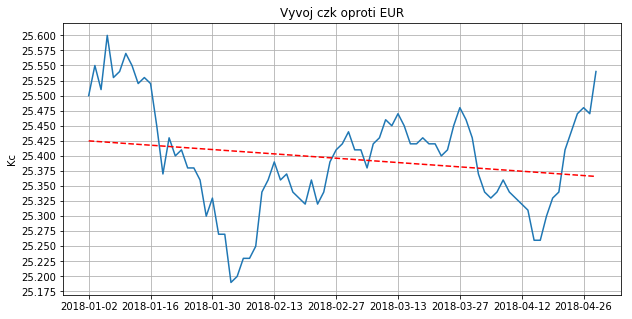

In [69]:
plt.plot(kurz_czk_euro['date'], kurz_czk_euro['czk'])

plt.xticks(np.arange(0, len(kurz_czk_euro['date']), 10))
plt.yticks(np.arange(25.15, 25.63, 0.025))

plt.grid(True)
plt.title('Vyvoj czk oproti EUR')
plt.ylabel('Kc')

r_p = np.arange(0, len(kurz_czk_euro['date']))
z = np.polyfit(r_p, kurz_czk_euro['czk'], 1)
p = np.poly1d(z)
plt.plot(r_p, p(r_p), 'r--')

plt.show()

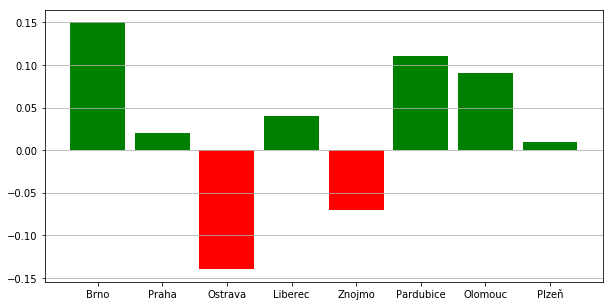

In [70]:
ind = np.arange(len(cena_bytu['balance_month']))
width = 0.85

maska_minus = cena_bytu['balance_month'] > 0
maska_plus = cena_bytu['balance_month'] < 0

plt.bar(ind, cena_bytu['balance_month'].mask(maska_minus), width, color='r')
plt.bar(ind, cena_bytu['balance_month'].mask(maska_plus), width, color='g')
plt.xticks(ind, cena_bytu.index) #xticks - nazvy polozek

plt.grid(True, axis='y')

plt.show()

In [71]:
mesta_cr

,population,area
city,,
Praha,1272690,496.09
Brno,384277,230.19
Ostrava,302456,214.22
Plzeň,169688,137.66
Liberec,102247,106.09
Olomouc,100043,103.33
Ústí nad Labem,95003,93.95
Hradec Králové,94242,105.69
České Budějovice,93883,55.60


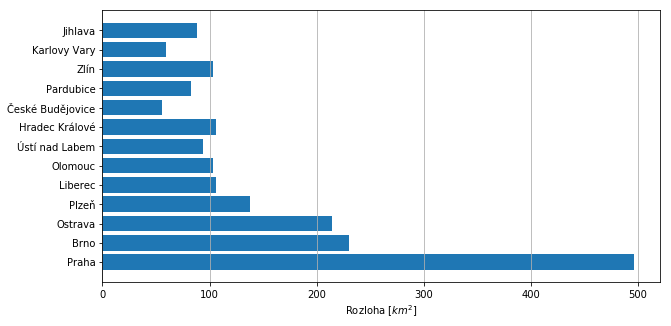

In [72]:
ind = np.arange(len(mesta_cr))

plt.barh(ind, mesta_cr['area'])
plt.yticks(ind, mesta_cr.index)
plt.xlabel(r'Rozloha $[km^2]$')

plt.grid(True, axis='x')

plt.show()

In [73]:
kurz

,women,men
class,,
A,4,3
B,3,6
C,5,12
D,0,6
E,2,8
F,9,9


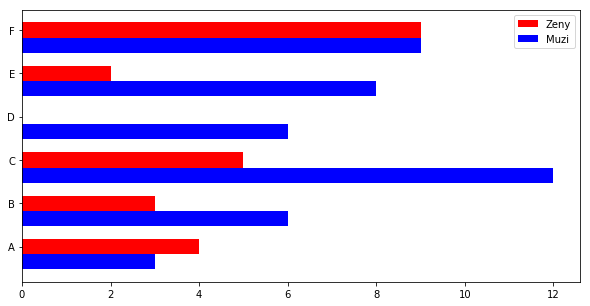

In [74]:
N = len(kurz)
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots()

p1 = ax.barh(ind, kurz['women'], width, color='r')
p2 = ax.barh(ind - width, kurz['men'], width, color = 'b')

plt.yticks(ind, kurz.index)
plt.legend((p1[0], p2[0]), ('Zeny', 'Muzi'))

plt.show()

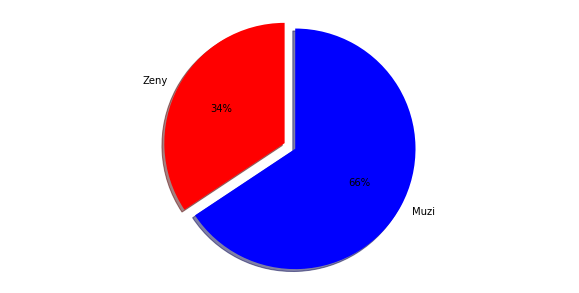

In [75]:
N = len(kurz)

ind = np.arange(N)
width = 0.35

fix, ax = plt.subplots()

sizes = [sum(kurz['women']), sum(kurz['men'])]
labels = ('Zeny', 'Muzi')
explode = (0, 0.1) #odstup
colors = ('r', 'b')

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%', shadow=True, startangle=90, colors=colors)
ax.axis('equal')
       
plt.show()

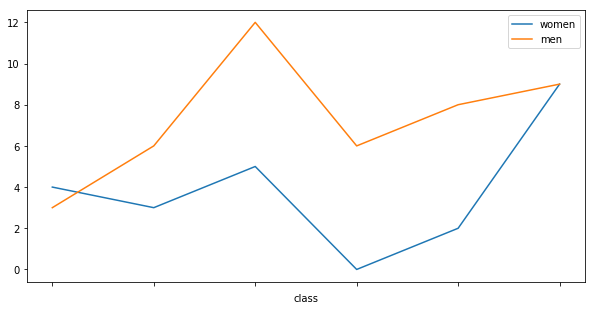

In [97]:
kurz.plot()

#ulozeni
plt.savefig('x.png')

BOKEH

In [77]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

In [78]:
#nasmerujeme vystup do notebooku
output_notebook()

Loading BokehJS ...

In [81]:
p = figure(plot_width=950, plot_height=450, title="KURZ CZK", y_axis_label="CZK", x_axis_type="datetime")
x = pandas.to_datetime(kurz_czk_euro['date'])
y = kurz_czk_euro['czk']

p.line(x, y, line_width=2)

show(p)

In [82]:
kurz_czk_euro.head()

,date,czk
0,2018-01-02,25.50
1,2018-01-03,25.55
2,2018-01-04,25.51
3,2018-01-05,25.60
4,2018-01-08,25.53


In [90]:
import math

cities = mesta_cr.index.values.tolist()
top = mesta_cr['population'].values.tolist()

p = figure(x_range=cities, plot_width=950, plot_height=550, title="Mesta CR")
p.vbar(x=cities, top=top, width=0.9)

p.xaxis.major_label_orientation = -math.pi/2
p.left[0].formatter.use_scientific = False

show(p)

In [92]:
cities = mesta_cr.index.values.tolist()
right = mesta_cr['population'].values.tolist()

p = figure(y_range=cities, plot_width=950, plot_height=550, title="Rozloha v km²")

p.hbar(y=cities, right=right, height=0.9)

show(p)

In [100]:
from bokeh.models import HoverTool
from bokeh.plotting import output_file

hover = HoverTool(tooltips=[('Hodonta', '$y CZK')])

p = figure(plot_width=950, plot_height=450, title="Kurz CZK", y_axis_label="CZK", x_axis_type='datetime', tools=[hover])
x = pandas.to_datetime(kurz_czk_euro['date'])
y = kurz_czk_euro['czk']

p.line(x, y, line_width=5)

show(p)

#ukladani v bokehu
output_file('hovering.html')